In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random as ran
import scipy.integrate as integrate
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [3]:
# Toss coin N times and return frequency of heads
def tossCoin(N):
    results = []
    for i in range(0,N):
        results.append(ran.choice([0,1]))
    return np.mean(results)
        
    

In [4]:
# Toss the coin for fun
tossCoin(1000000)

0.49902600000000003

In [5]:
# Toss 'coins' coins N times and return the interesting coins in a 3-tuple
def getInterestCoins(coins, N):
    results = []
    for i in range(coins):
        results.append(tossCoin(N))
    return (results[0], ran.choice(results), min(results))

In [11]:
c1 = []
c_ran = []
c_min = []
for i in range(100000):
    trial = getInterestCoins(1000, 10)
    c1.append(trial[0])
    c_ran.append(trial[1])
    c_min.append(trial[2])

In [10]:
print("Average of c1: " + str(np.mean(c1)))

print("Average of c_ran: " + str(np.mean(c_ran)))

print("Average of c_min: " + str(np.mean(c_min)))

Average of c1: 0.499788
Average of c_ran: 0.499046
Average of c_min: 0.037341


In [7]:
# make a line between two random points
def getLine():
    (x1, y1) = (ran.uniform(-1,1), ran.uniform(-1,1))
    (x2, y2) = (ran.uniform(-1,1), ran.uniform(-1,1))
    line = lambda x:(y2-y1)/(x2-x1)*(x-x1)
    return line

In [8]:
# Generate N unlabeled test pts
def generatePts(N):
    pts = []
    for i in range(0,N):
        pt = ran.uniform(-1,1), ran.uniform(-1,1)
        pts.append(pt)
    return pts

In [9]:
# label and return a given set of points
def labelPts(pts, line, noise = False):
    labeled_pts = []
    for pt in pts:
        if pt[1] > line(pt[0]):
            labeled_pts.append([1, pt[0], pt[1], 1])
        else:
            labeled_pts.append([1, pt[0], pt[1], -1])
    
    if noise:
        for pt in labeled_pts:
            # 1/10 chance we flip
            if ran.choice(range(10)) == 1:
                pt[3] = -pt[3]
    return labeled_pts

In [10]:
# runs regression on given pts classified by given target
# if testing is on it returns (w, E_in, E_out)
# if testing is off it returns w, line of best fit
def doRegression(pts, target, graph = True, test = True):
    # generate points labeled according to the target function
    line = target
    labeled_pts = labelPts(pts, line)
    
    
    # format data for sklearn package
    x = []
    y = []
    for pt in labeled_pts:
        x.append([pt[1],pt[2]])
        y.append(pt[3])
        
    # perform regression with sklearn
    lm = LinearRegression(fit_intercept=True)
    lm.fit(x,y)
    
    # compile resulting w 
    w = [lm.intercept_, lm.coef_[0],lm.coef_[1]]
    
    # line of best fit:
    rline = lambda x1:-(w[0]+w[1]*x1)/w[2]
    
    # graph things if asked
    if graph == True:
        X = np.linspace(-1,1,1000)
        y = line(X)
        ry = rline(X)
        plt.ylim(-1,1)
        plt.xlim(-1,1)
        plt.plot(X,y, color = "blue", label = "target function")
        plt.plot(X,ry, color = "red", label = "regression line")
        plt.legend()
        for pt in labeled_pts:
            if pt[3] == 1:
                plt.plot(pt[1],pt[2], 'g^')
            else:
                plt.plot(pt[1],pt[2], 'r^')
                
                
    # approximate E_in and E_out if testing is requested
    if test:
        test_pts = labelPts(generatePts(1000), line)
        
        
        E_in = 0
        for pt in labeled_pts:
            if np.sign(w[0]+w[1]*pt[1]+w[2]*pt[2]) != pt[3]:
                E_in += 1
        E_in /= float(len(labeled_pts))
        
        E_out = 0
        for pt in test_pts:
            if np.sign(w[0]+w[1]*pt[1]+w[2]*pt[2]) != pt[3]:
                E_out += 1
                
        E_out /= 1000.0
        return w, E_in, E_out
        
    
    return w, rline
    

([-0.37371213847165796, 0.64008593379375134, 1.2481589686929375], 0.0, 0.017)

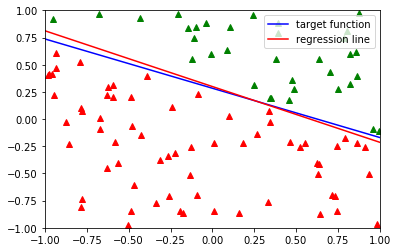

In [11]:
# run a regression for fun and eye test
doRegression(generatePts(100), getLine())

In [12]:
# get E_in and approx E_out by random sampling
E_ins = []
E_outs = []
for i in range(1000):
    result = doRegression(generatePts(100),getLine(), graph = False)
    
    E_ins.append(result[1])
    E_outs.append(result[2])

E_in = np.mean(E_ins)
E_out = np.mean(E_outs)


print("AVERAGE VALUES FOR 1000 ATTEMPTS:")
print ("E_in: " + str(E_in))
print("E_out: " + str(E_out))

AVERAGE VALUES FOR 1000 ATTEMPTS:
E_in: 0.03485
E_out: 0.04404


In [13]:
# run the PLA, graph if asked, test w/ 1000 pts if asked
# sets w based on the result of regression on the points.
# returns iterations required. If testing=True returns missed pts out of 1000 as well
def doRegPLA(N, graph = True, test = True):
    line = getLine()
    pts = generatePts(N)
    
    # get starting w via regression
    reg = doRegression(pts, line, test = False, graph = False)
    w = reg[0]
    rline = reg[1]
    
    if graph:
        X = np.linspace(-1,1,1000)
        ry = rline(X)
        plt.plot(X,ry, color = 'purple', label = "regression line")
    



    labeled_pts = labelPts(pts, line)
    
            
            
    # Graph target function and labeled pts if we want
    if graph == True:
        X = np.linspace(-1,1,1000)
        y = line(X)
        plt.ylim(-1,1)
        plt.xlim(-1,1)
        plt.plot(X,y, label = "target function", color = "blue")
        
        for pt in labeled_pts:
            if pt[3] == 1:
                plt.plot(pt[1],pt[2], 'g^')
            else:
                plt.plot(pt[1],pt[2], 'r^')
            
    
    mis_pts = []
        
    for pt in labeled_pts:
        if np.sign(w[0]+w[1]*pt[1]+w[2]*pt[2]) != pt[3]:
            mis_pts.append(pt)
    
    # begin perceptron iterations and count them
    iters = 0
    while len(mis_pts) is not 0:
        # choose randoim missclasified point and update
        pt = ran.choice(mis_pts)
        
        w[0] += pt[3]*pt[0]
        w[1] += pt[3]*pt[1]
        w[2] += pt[3]*pt[2]
        
        
        # recheck for misclassified points
        mis_pts = []
        
        for pt in labeled_pts:
            if np.sign(w[0]+w[1]*pt[1]+w[2]*pt[2]) != pt[3]:
                mis_pts.append(pt)
        iters += 1
        
    pline = lambda x: -(x*w[1]+w[0])/w[2]


    if graph == True:
        xp = np.linspace(-1,1,1000)
        yp = pline(xp)
        plt.plot(xp, yp, "yellow", label = "perceptron line")
        plt.legend()
    
    # if we want to test, we will test:
    if test == True:
        # generate and label 10000 test points according to f(x)
        test_points = generatePts(1000)

        labeled_test_pts = []
        for pt in test_points:
            if pt[1] > line(pt[0]):
                labeled_test_pts.append([1, pt[0], pt[1], 1])
            else:
                labeled_test_pts.append([1, pt[0], pt[1], -1])

        # count misclassified test points
        mis_labeled_pts = []
        for pt in labeled_test_pts:
            if np.sign(w[0]+w[1]*pt[1]+w[2]*pt[2]) != pt[3]:
                mis_labeled_pts.append(pt)
    
        return iters, len(mis_labeled_pts)
    
    return iters

21

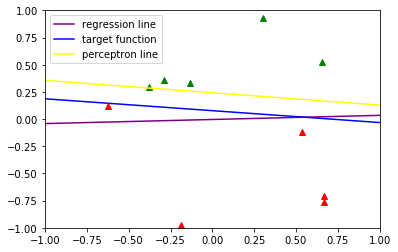

In [14]:
# run the primed PLA for eye-test
doRegPLA(10, test=False)

In [15]:
# average iterations over 1000 PLA runs
iters = []
for i in range(1000):
    iters.append(doRegPLA(10, graph = False, test = False))


print("average Iterations: " + str(np.mean(iters)))

average Iterations: 4.214


In [124]:
def doReg(data, graph = True, test = True):
    # format data for sklearn package
    x = []
    y = []
    for pt in data:
        x.append(pt[1:len(pt)-1])
        y.append(pt[len(pt)-1])
    
    
    lm = LinearRegression(fit_intercept=True)
    lm.fit(x,y)
    
    w = []
    w.append(lm.intercept_)
    coef = lm.coef_
    for i in range(len(coef)):
        w.append(coef[i])
        
    # w = [lm.intercept_, lm.coef_[0],lm.coef_[1]]
    rline = lambda x1:-(w[0]+w[1]*x1)/w[2]
    
    if graph:
        for pt in data:
            if pt[len(pt)-1] == 1:
                plt.plot(pt[1],pt[2], 'g^')
            else:
                plt.plot(pt[1],pt[2], 'r^')
                
        X = np.linspace(-1,1,1000)
        ry = rline(X)
        plt.ylim(-1,1)
        plt.xlim(-1,1)
        plt.plot(X,ry, color = "magenta", label = "regression line")
        plt.legend()
    
    if test:
        E_in = 0
        for x in data:
            prod = 0
            for i in range(len(w)):
                prod += x[i]*w[i]
            if np.sign(prod) != x[len(x)-1]:
                E_in += 1
        E_in /= float(len(data))
        
        return w, E_in
    return w
        
        
    
        

([0.029624295381474857, -0.023362837885775482, -0.053256269705368689], 0.56)

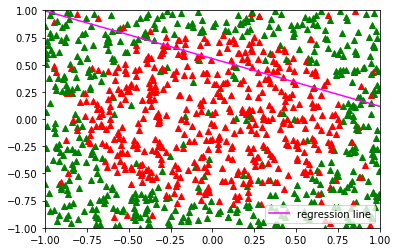

In [125]:
# set target function and label pts with simulated noise
# do a regression for eye-test

target = lambda x1, x2: np.sign(x1**2+x2**2-0.6)
raw = generatePts(1000)
data = []
for x in raw:
    data.append([1, x[0], x[1], target(x[0],x[1])])

for x in data:
    if ran.choice(range(10)) == 1:
        x[3] = -x[3]
doReg(data, graph = True)

In [126]:
# average E_in over 1000 runs for non transformed data
E_ins = []
for i in range(1000):
    target = lambda x1, x2: np.sign(x1**2+x2**2-0.6)
    raw = generatePts(1000)
    data = []
    for x in raw:
        data.append([1, x[0], x[1], target(x[0],x[1])])

    for x in data:
        if ran.choice(range(10)) == 1:
            x[3] = -x[3]
    E_ins.append(doReg(data, graph = False)[1])

In [127]:
print("average E_in: " + str(np.mean(E_ins)))

average E_in: 0.505405


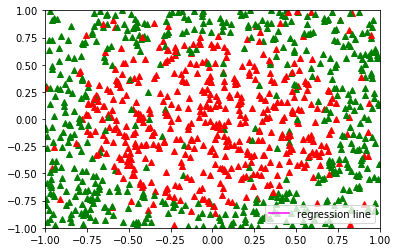

In [128]:
target = lambda x1, x2: np.sign(x1**2+x2**2-0.6)
raw = generatePts(1000)
data = []
for x in raw:
    data.append([1, x[0], x[1], target(x[0],x[1])])

for x in data:
    if ran.choice(range(10)) == 1:
        x[len(x)-1] = -x[len(x)-1]

trans_data = []
for x in data:
    trans_data.append([1,x[1],x[2],x[1]*x[2],x[1]**2,x[2]**2,x[3]])
    
w = doReg(trans_data, test=False)

In [141]:
ws = [[],[],[],[],[],[]]
errors = []

# w's for the options
w_a = [-1,-.05,0.08,0.13,1.5,1.5]
w_b = [-1,-.05,.08,.13,1.5,15]
w_c = [-1,-.05,.08,.13,15,1.5]
w_d = [-1,-1.5,.08,.13,.05,.05]
w_e = [-1,-.05,.08,1.5,.15,.15]
for i in range(1000):
    # generate labeled pts w/ noise
    target = lambda x1, x2: np.sign(x1**2+x2**2-0.6)
    raw = generatePts(1000)
    data = []
    for x in raw:
        data.append([1, x[0], x[1], target(x[0],x[1])])

    for x in data:
        if ran.choice(range(10)) == 1:
            x[len(x)-1] = -x[len(x)-1]

    # generate transformed data set
    trans_data = []
    for x in data:
        trans_data.append([1,x[1],x[2],x[1]*x[2],x[1]**2,x[2]**2,x[3]])
    
    # run regression in Z space
    w = doReg(trans_data, test=False, graph=False)
    
    # keep track of w's for this run
    for i in range(len(w)):
        ws[i].append(w[i])
        
    
    # test E_out with 1000 noisy points
    raw_test=generatePts(1000)
    test_data = []
    for x in raw_test:
        test_data.append([1, x[0], x[1], target(x[0],x[1])])

    for x in test_data:
        if ran.choice(range(10)) == 1:
            x[len(x)-1] = -x[len(x)-1]

    trans_test_data = []
    for x in test_data:
        trans_test_data.append([1,x[1],x[2],x[1]*x[2],x[1]**2,x[2]**2,x[3]])
    
    # approx E_out for the five w's
    E_in = 0
    E_a = 0
    E_b = 0
    E_c = 0
    E_d = 0
    E_e = 0
    
    for x in trans_test_data:
        prod = 0
        prod_a = 0
        prod_b = 0
        prod_c = 0
        prod_d = 0
        prod_e = 0
        
        for i in range(len(w)):
            prod += x[i]*w[i]
            prod_a += x[i]*w_a[i]
            prod_b += x[i]*w_b[i]
            prod_c += x[i]*w_c[i]
            prod_d += x[i]*w_d[i]
            prod_e += x[i]*w_e[i]
    
        if np.sign(prod) != x[len(x)-1]:
            E_in += 1
        
        if np.sign(prod) != np.sign(prod_a):
            E_a += 1
            
        if np.sign(prod) != np.sign(prod_b):
            E_b += 1
        
        if np.sign(prod) != np.sign(prod_c):
            E_c += 1
            
        if np.sign(prod) != np.sign(prod_d):
            E_d += 1
            
        if np.sign(prod) != np.sign(prod_e):
            E_e += 1
            
            
    E_a /= float(len(trans_test_data))
    E_b /= float(len(trans_test_data))
    E_c /= float(len(trans_test_data))
    E_d /= float(len(trans_test_data))
    E_e /= float(len(trans_test_data))
    
    
    E_in /= float(len(trans_test_data))
    errors.append(E_in)

        

In [142]:
print("AVERAGES: ")
print("E_a: " + str(E_a))
print("E_b: " + str(E_b))
print("E_c: " + str(E_c))
print("E_d: " + str(E_d))
print("E_e: " + str(E_e))

AVERAGES: 
E_a: 0.046
E_b: 0.349
E_c: 0.322
E_d: 0.381
E_e: 0.447


In [122]:
print('AVERGAES')
for i in range(len(ws)):
    print ('w_' + str(i) + ': ' + str(np.mean(ws[i])))
    

AVERGAES
w_0: -0.991873753407
w_1: 0.00176627230769
w_2: -0.00129835540913
w_3: -0.00120287709573
w_4: 1.55874871723
w_5: 1.55733598801


In [131]:
print('AVERAGE E_out estimate: ' + str(np.mean(errors)))

AVERAGE E_out estimate: 0.127061
